In [1]:
import sklearn
import nltk

from generateWordFrequency import *
from naiveBayes import *
from fileWriteFunctions import *

In [2]:
AllClasses = ['story', 'ask_hn', 'show_hn', 'poll']
delta = 0.5
appendClassPrefix = 'prob_'

In [3]:
trainData = getDataframe(2018)
trainData = addTokenizedColumnofTitle(trainData)
priorProbabilities = getPriorProbabilities(trainData)

In [4]:
testData = getDataframe(2019)
testData = addTokenizedColumnofTitle(testData)
testData = testData.reset_index()

In [5]:
testData.head()

,index,Title,Post Type,Number of Comments,Points,Author,tokenized_title
0,276981,The Tech That Was Fixed in 2018 and the Tech T...,story,0.0,3,MagicPropmaker,"[the, tech, that, be, fix, in, 2018, and, the,..."
1,276982,Why Is the Google Podcasts App Failing So Hard?,story,0.0,4,wenbin,"[why, be, the, google, podcast, app, fail, so,..."
2,276983,Doing Dishes Is the Worst,story,0.0,2,paulpauper,"[do, dish, be, the, bad]"
3,276984,Setting Up a MongoDB Replica Set with Docker a...,story,0.0,1,tugberk,"[set, up, a, mongodb, replica, set, with, dock..."
4,276985,History favors co-operation and non-zero sum g...,story,0.0,3,asimjalis,"[history, favor, co-operation, and, non-zero, ..."


In [6]:
accuracies = []
for delta in 0.1*np.arange(0,11):
    trainWords = getWordFrequencyDataframe(trainData,AllClasses)
    trainWords = obtainDataframeWithClassProbabilities(trainWords, AllClasses, delta, appendClassPrefix)
    trainWords = renameModelRows(trainWords, AllClasses, appendClassPrefix)
    model = [trainWords, priorProbabilities]
    
    testData = generateCondClassProb(testData, model)
    testData['predicted'] = generatePrediction(testData,AllClasses)
    testResults = comparePredictions(testData,AllClasses)
    check = testResults.comparision.value_counts()
    accuracy = check[True]/(check[True]+check[False])
    accuracies.append(accuracy)
    print(delta,accuracy)

0.0 0.9423751047625989
0.1 0.965586852749335
0.2 0.971234923295558
0.30000000000000004 0.9759355755566083
0.4 0.9796523703676712
0.5 0.9826112305505957
0.6000000000000001 0.9852785774150057
0.7000000000000001 0.9872608679809058
0.8 0.9884779360857049
0.9 0.9896002623619866
1.0 0.9902343038297562


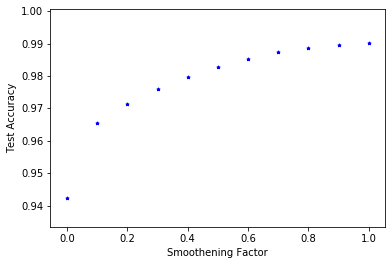

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.scatter(0.1*np.arange(0,11), accuracies, marker='*',
           s=10, facecolor='blue')
plt.xlabel('Smoothening Factor')
plt.ylabel('Test Accuracy')
plt.show()